In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

# Анализ датасета домов

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [15]:
dataset = load_boston()
data2 = pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
data2['PRICE'] = dataset.target
data2.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [16]:
pd.isnull(data2).any() #проверка на наличие пустых данных

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

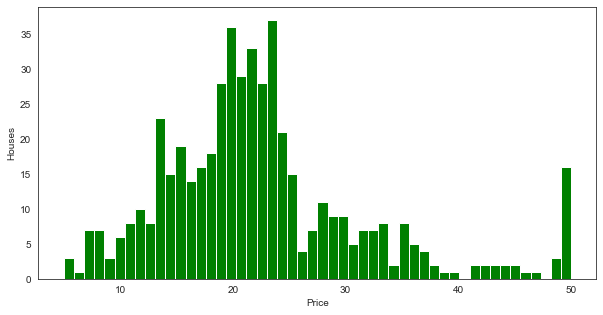

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(data2['PRICE'], bins=50, color='green')
plt.xlabel('Price')
plt.ylabel('Houses')
plt.show()

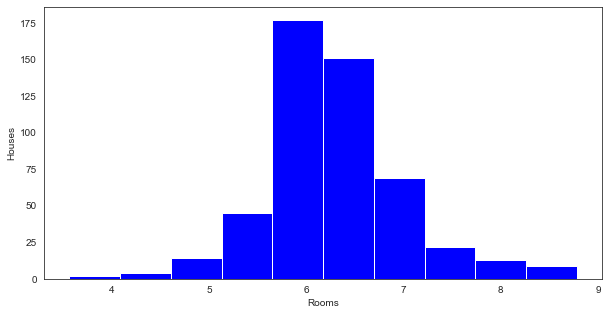

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(data2['RM'], color='blue')
plt.xlabel('Rooms')
plt.ylabel('Houses')
plt.show()

In [19]:
data2['PRICE'].corr(data2['RM'])

0.6953599470715394

In [20]:
data2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


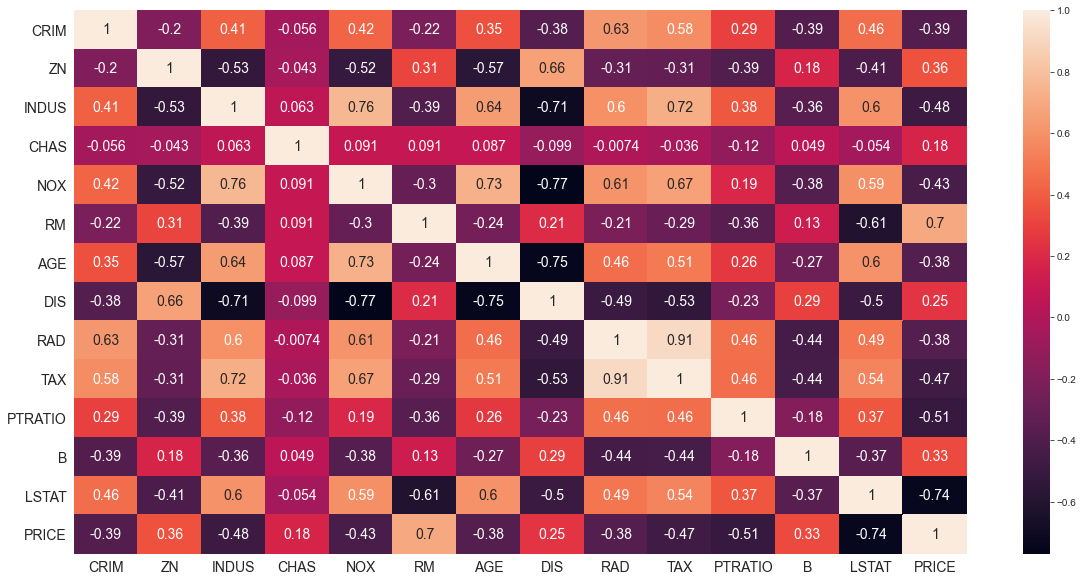

In [21]:
mask = np.zeros_like(data2.corr())
plt.figure(figsize=(20, 10))
sns.heatmap(data2.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [22]:
prices = data2['PRICE']
features = data2.drop('PRICE', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [23]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('train data r-squared', regr.score(x_train, y_train)) #Показывает, насколько модель точная
print('test data r-squared', regr.score(x_test, y_test))
print('intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

train data r-squared 0.750121534530608
test data r-squared 0.6709339839115658
intercept 36.53305138282472


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [24]:
y_log = np.log(data2['PRICE'])

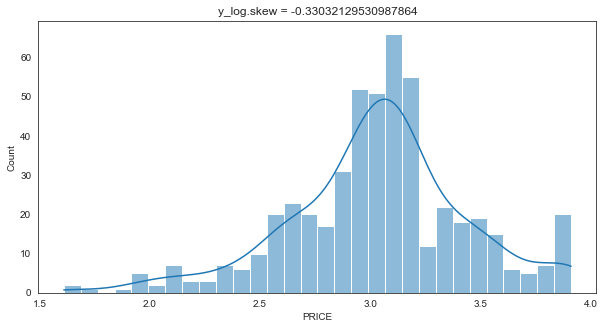

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(y_log, kde=True, bins=30)
plt.title(f'y_log.skew = {y_log.skew()}')
plt.show()

In [26]:
print('coef_\t', regr.coef_)

coef_	 [-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]


In [27]:
data2.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [28]:
X = np.array([[0.02, 0.0, 5.0, 0.0, 0.458, 5.0, 0.0, 3.0, 1.0, 222.0, 15.0, 392.63, 4.0]])
subdata2 = data2.iloc[[2]]
subdata2 = subdata2.drop('PRICE', 1)
subdata2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [29]:
regr.predict(subdata2.iloc[[0]])

array([30.0323026])

In [30]:
regr.predict(X)

array([27.60739077])